In [65]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

import pickle
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from yellowbrick.cluster.elbow import KElbowVisualizer

import common

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

num_features = X_train_faces.shape[1]
print(y_train_faces.shape)
print()

n = y_train_faces.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

(2800, 3)

No.of.unique values in each column :
 age     98
sex      2
race     5
dtype: int64


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
reload(common)
n = 96
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(X_train_faces, n)


For n_clusters = 2 average silhouette_score: 0.05609058693638017 time taken: 0.26433849334716797s
For n_clusters = 3 average silhouette_score: 0.04302308816168675 time taken: 0.18338322639465332s
For n_clusters = 4 average silhouette_score: 0.032916657871269954 time taken: 0.26122212409973145s
For n_clusters = 5 average silhouette_score: 0.026051050142098246 time taken: 0.3143434524536133s
For n_clusters = 6 average silhouette_score: 0.015097250000238134 time taken: 0.6275627613067627s
For n_clusters = 7 average silhouette_score: 0.010710313474553632 time taken: 0.5186536312103271s
For n_clusters = 8 average silhouette_score: 0.013746282201068587 time taken: 0.5138487815856934s
For n_clusters = 9 average silhouette_score: 0.01456448053429046 time taken: 0.6605908870697021s
For n_clusters = 10 average silhouette_score: 0.00596193495523426 time taken: 0.40198683738708496s
For n_clusters = 11 average silhouette_score: 0.0043752452304751865 time taken: 0.5023901462554932s
For n_clusters = 

For n_clusters = 85 average silhouette_score: -0.006386728486175437 time taken: 11.305490493774414s
For n_clusters = 86 average silhouette_score: -0.007400183355623622 time taken: 12.760148525238037s
For n_clusters = 87 average silhouette_score: -0.0046256180454104946 time taken: 14.36406922340393s
For n_clusters = 88 average silhouette_score: -0.0016192816294866362 time taken: 12.83809208869934s
For n_clusters = 89 average silhouette_score: -0.008228252437034152 time taken: 11.815941333770752s
For n_clusters = 90 average silhouette_score: -0.0034394109856672296 time taken: 11.452487468719482s
For n_clusters = 91 average silhouette_score: -0.004916909248072299 time taken: 13.14230728149414s
For n_clusters = 92 average silhouette_score: -0.006769140577748246 time taken: 12.24515986442566s
For n_clusters = 93 average silhouette_score: -0.008037194998342054 time taken: 12.90206527709961s
For n_clusters = 94 average silhouette_score: -0.007347093621424932 time taken: 11.331095695495605s
Fo

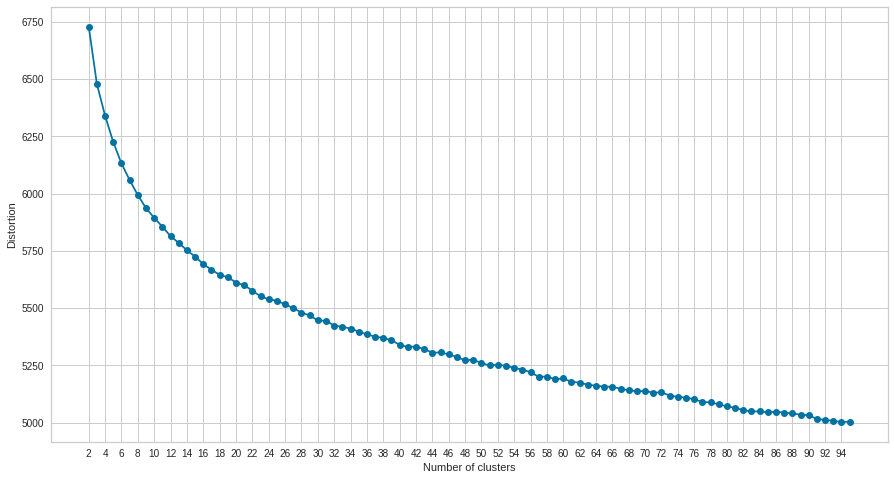

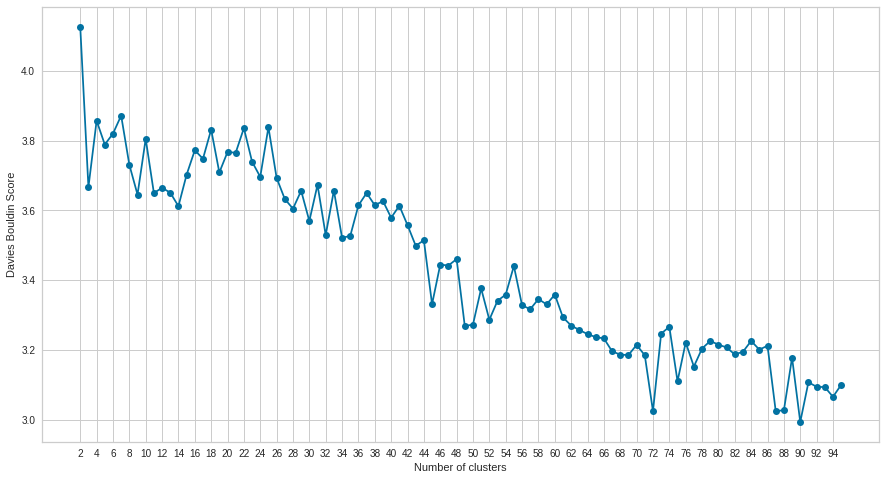

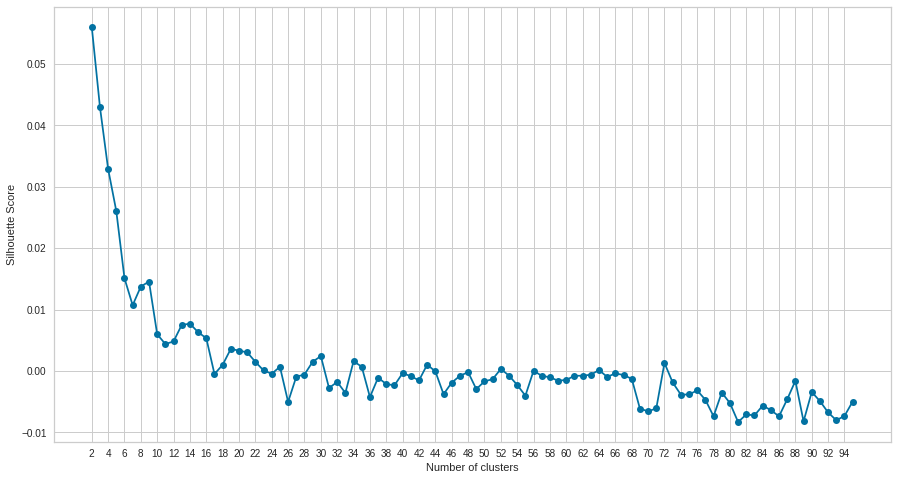

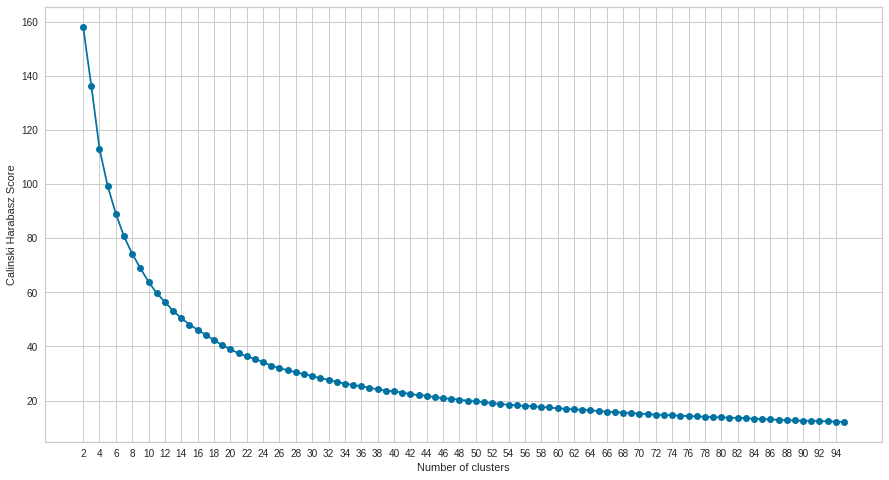

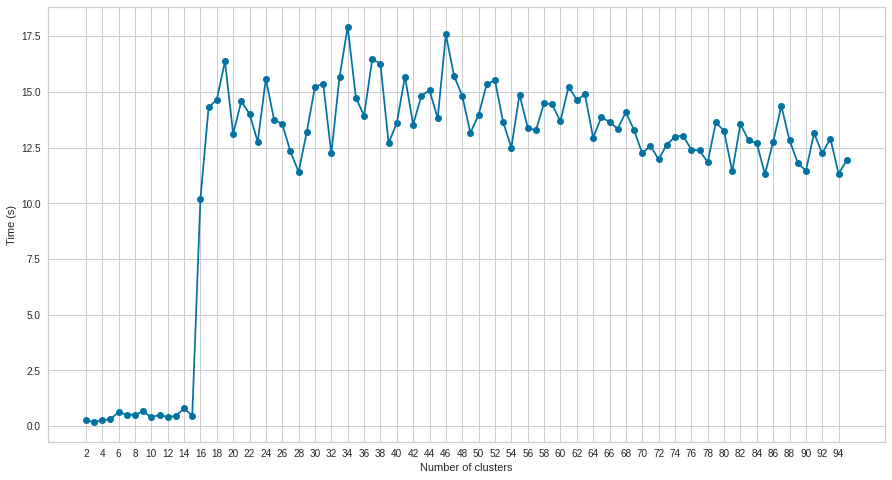

In [4]:
# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n), distortions, marker='o')
plt.xticks(range(2, n, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n), davies_bouldin_scores, marker='o')
plt.xticks(range(2, n, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n), silhouette_scores, marker='o')
plt.xticks(range(2, n, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
                    
# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n), calinski_harabasz_scores, marker='o')
plt.xticks(range(2, n, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n), times, marker='o')
plt.xticks(range(2, n, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Time (s)')
plt.show()

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


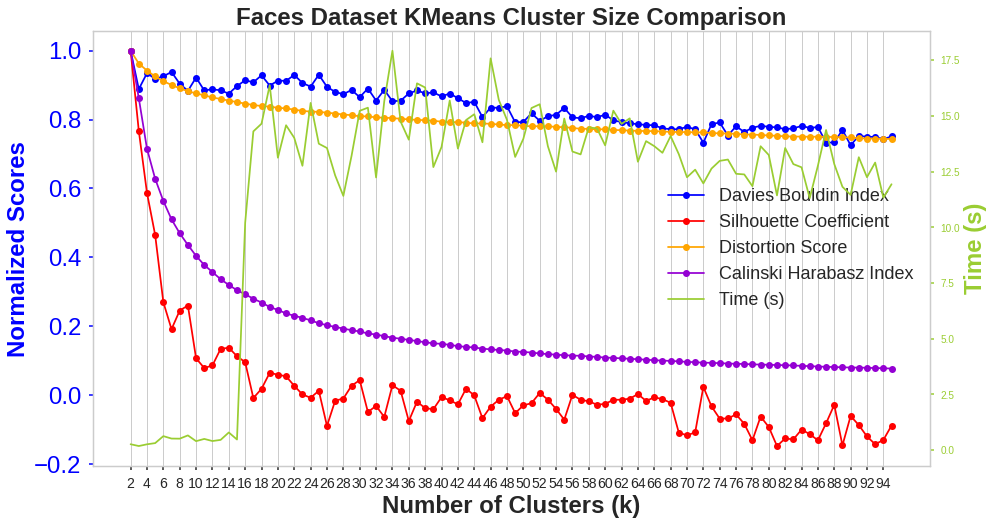

In [5]:
reload(common)
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


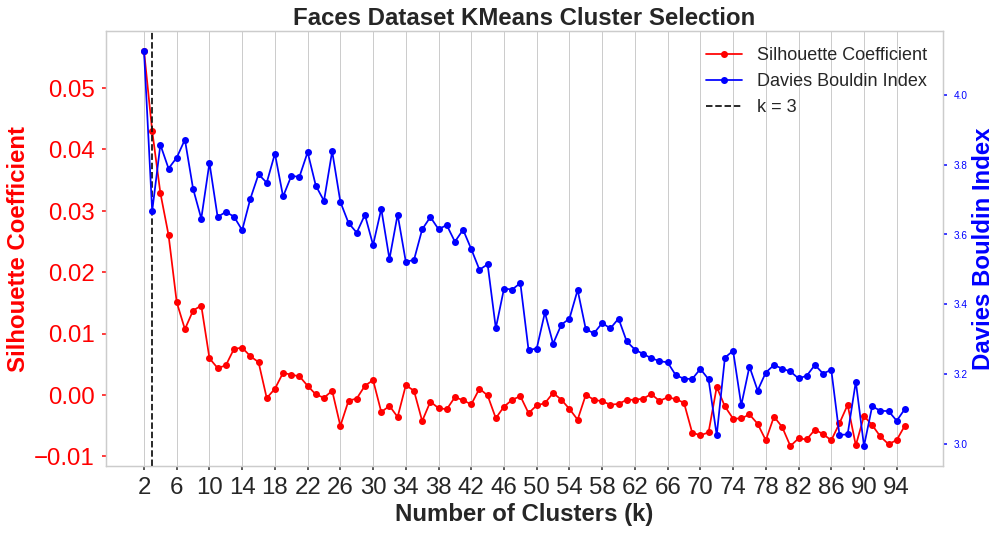

In [66]:
reload(common)
best_k = 3
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 3 average silhouette_score: 0.04302308816168675 time taken: 0.21327853202819824s


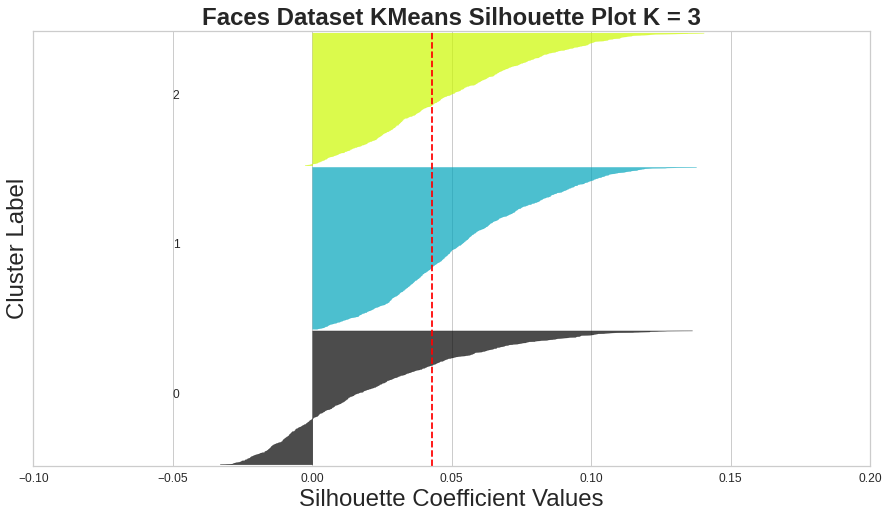

In [67]:
reload(common)
common.plot_silhouette_kmeans(X_train_faces, best_k, DATASET, xlim=[-0.1, 0.2])

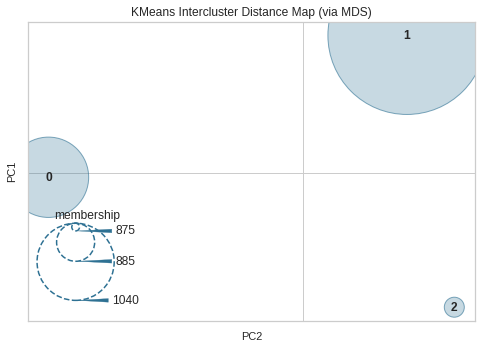

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [68]:
# https://www.scikit-yb.org/en/latest/api/cluster/icdm.html
# Instantiate the clustering model and visualizer
model = KMeans(best_k)
visualizer = InterclusterDistance(model)

visualizer.fit(X_train_faces)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [71]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(X_train_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
X_train_faces_km = X_train_faces.copy()
X_train_faces_km['km_labels'] = km.labels_

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))


Time Taken 0.9228641986846924 s
homogeneity_score sex:  0.012852880068571186
homogeneity_score race:  0.0037600681517427235


In [70]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(X_train_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]


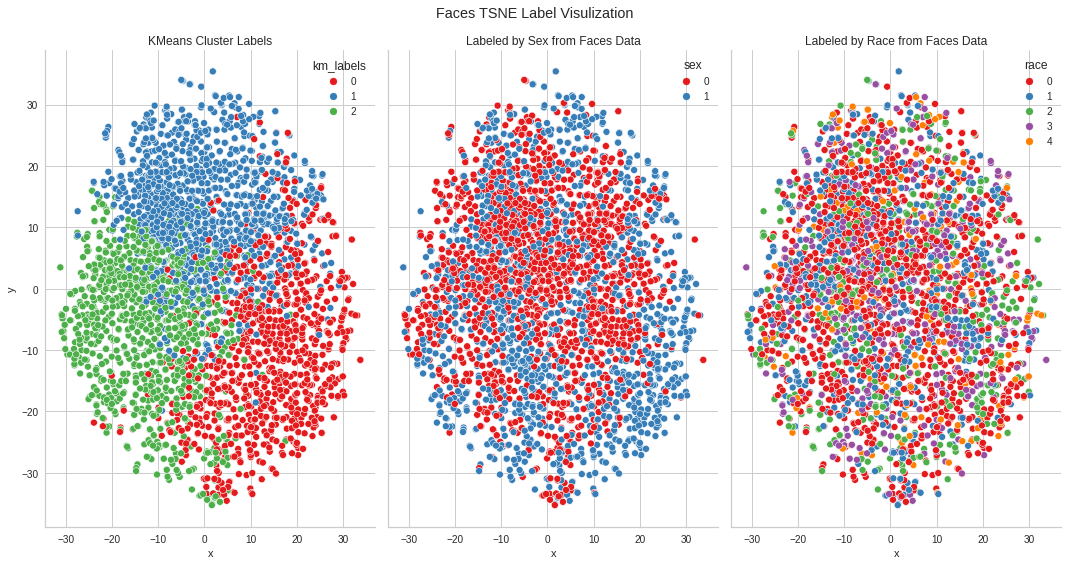

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

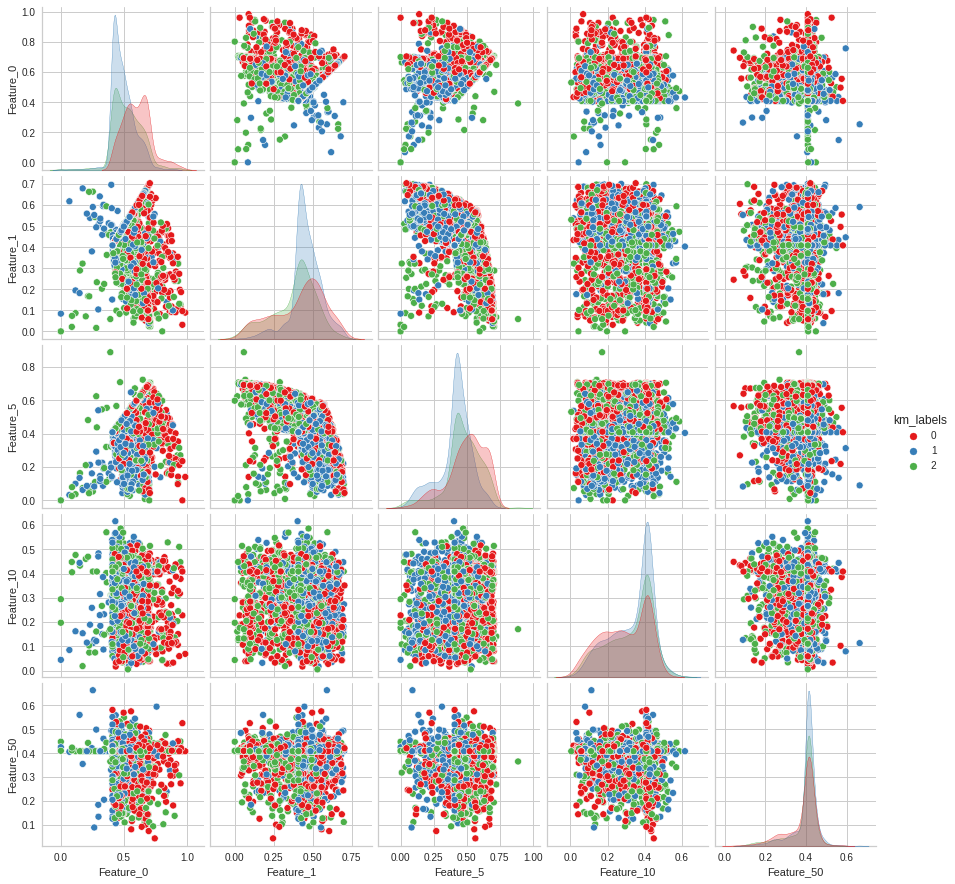

In [12]:
sns.pairplot(X_train_faces_km[["Feature_0", "Feature_1", "Feature_5", "Feature_10", "Feature_50", "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [13]:
reload(common)
em_n = 45
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(X_train_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.04764694240198667 time taken: 3.335012912750244s
For n_clusters = 3 average silhouette_score: 0.03350270982765027 time taken: 5.45751953125s
For n_clusters = 4 average silhouette_score: 0.034976656406414335 time taken: 3.9862782955169678s
For n_clusters = 5 average silhouette_score: 0.02337078841053656 time taken: 2.8533084392547607s
For n_clusters = 6 average silhouette_score: 0.0139246165479129 time taken: 1.4919180870056152s
For n_clusters = 7 average silhouette_score: 0.016182661198363302 time taken: 2.4907588958740234s
For n_clusters = 8 average silhouette_score: 0.011644828829564281 time taken: 1.2610557079315186s
For n_clusters = 9 average silhouette_score: 0.008358256713588412 time taken: 1.0358073711395264s
For n_clusters = 10 average silhouette_score: 0.01026581074355314 time taken: 1.9213685989379883s
For n_clusters = 11 average silhouette_score: 0.008484138592204095 time taken: 1.029207706451416s
For n_clusters = 12 average sil

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:248: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


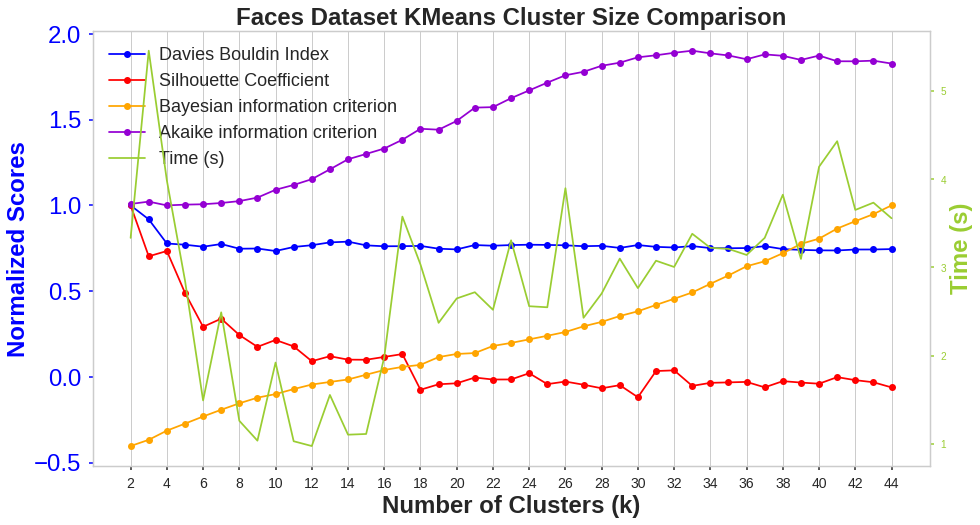

In [27]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

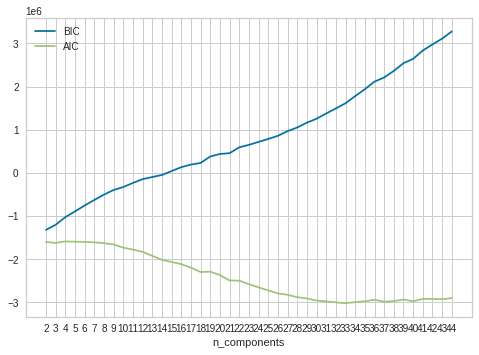

In [14]:
plt.plot(n_components, bic_scores_em, label='BIC')
plt.plot(n_components, aic_scores_em, label='AIC')
plt.legend(loc='best')
plt.xticks(range(2, em_n, 1))
plt.xlabel('n_components');

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:299: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


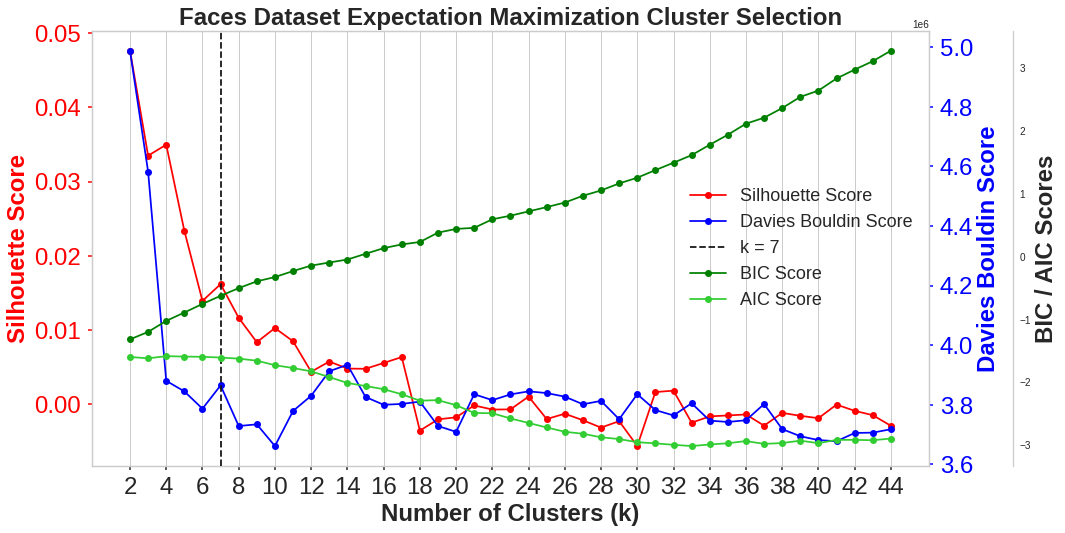

In [72]:
reload(common)
best_k = 7
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=2)

For n_clusters = 7 average silhouette_score: 0.016182661198363302 time taken: 2.624568223953247s


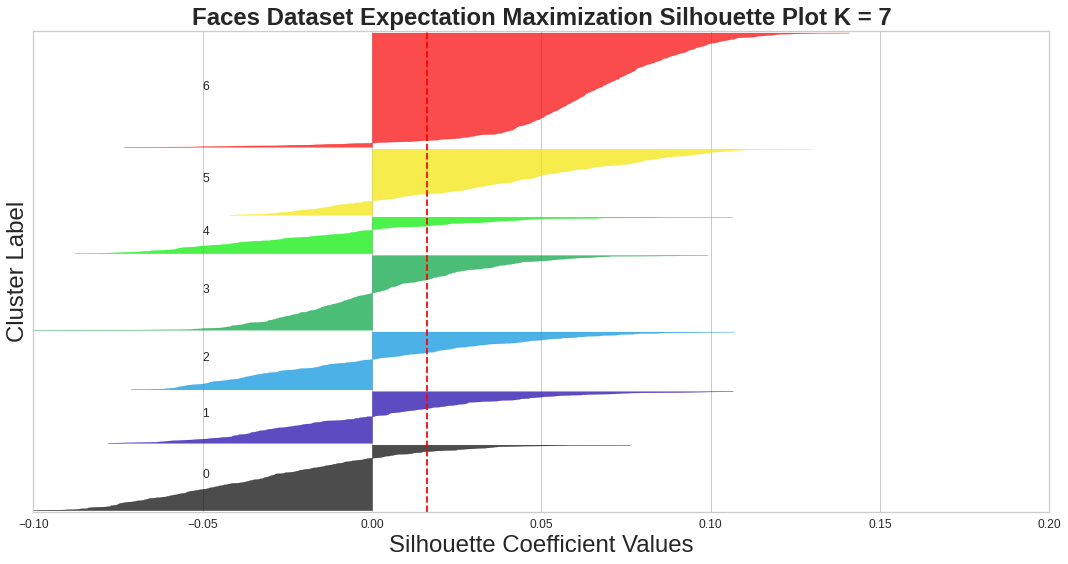

In [73]:
reload(common)
best_k=7
common.plot_silhouette_em(X_train_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [74]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(X_train_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(X_train_faces)
X_train_faces_gm = X_train_faces.copy()
X_train_faces_gm['em_labels'] = em_model.predict(X_train_faces)

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(X_train_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(X_train_faces), y_train_faces['race']))

time taken 1.4362211227416992 s
homogeneity_score sex:  0.018701564776389522
homogeneity_score race:  0.013743996803612208


In [75]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(X_train_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

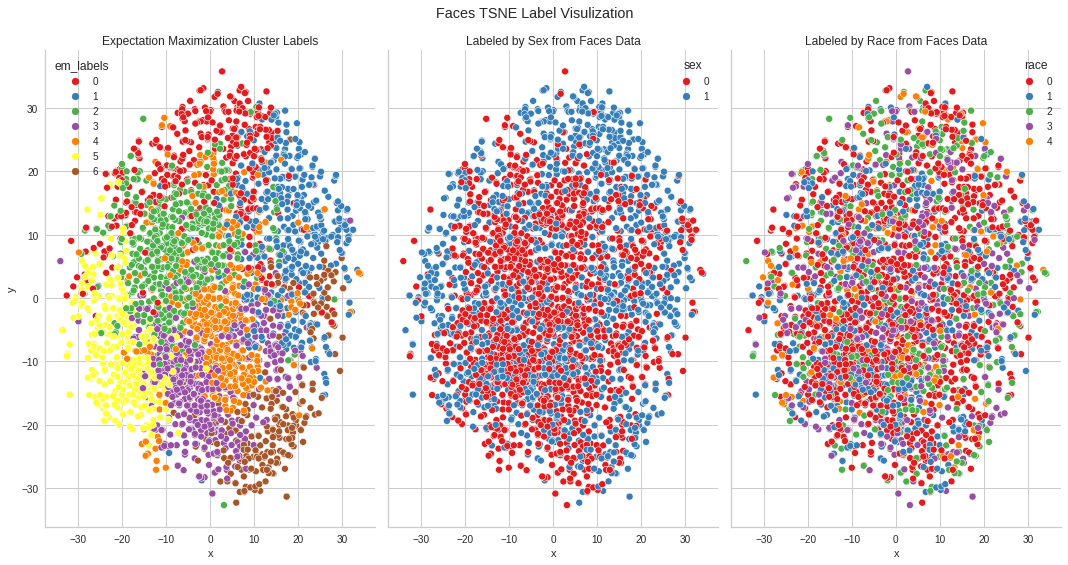

In [61]:
# sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1")
# plt.show()
# sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1")
# plt.show()
# sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1")
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

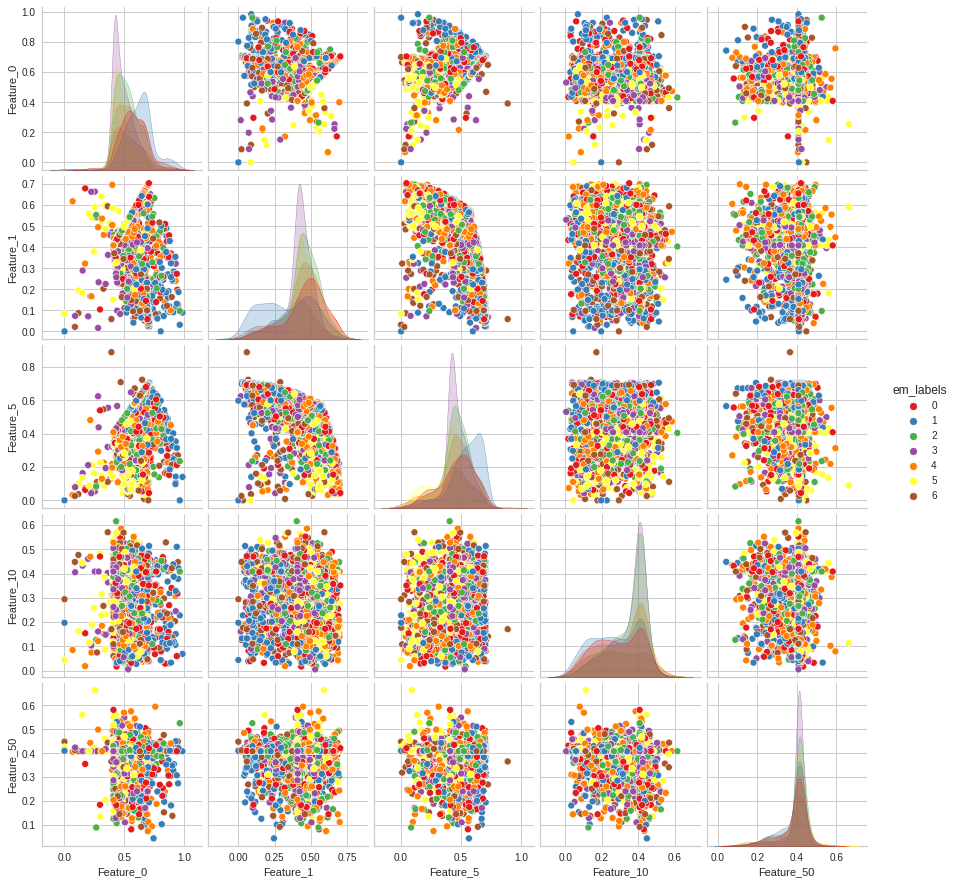

In [59]:
sns.pairplot(X_train_faces_gm[["Feature_0", "Feature_1", "Feature_5", "Feature_10", "Feature_50", "em_labels"]], hue="em_labels", palette="Set1")